In [3]:
def plot_melspectrogram(path_to_noisy_clip, path_to_clean_clip):

    import librosa
    import librosa.display
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io import wavfile

    sr, noisy = wavfile.read(path_to_noisy_clip)
    sr, clean = wavfile.read(path_to_clean_clip)

    noisy = noisy.astype(np.float32)
    clean = clean.astype(np.float32)

    # setting up the plot

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_figwidth(21)
    fig.set_figheight(8)
    n, hop_length = 128, 128

    # noisy

    S = librosa.feature.melspectrogram(noisy, sr=sr, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img1 = librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[0])
    ax[0].set(title='Noisy clip')

    # clean

    S = librosa.feature.melspectrogram(clean, sr=sr, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img2 = librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set(title='Clean clip')

    # plot

    _ = fig.colorbar(img1, ax=[ax[0], ax[1]])


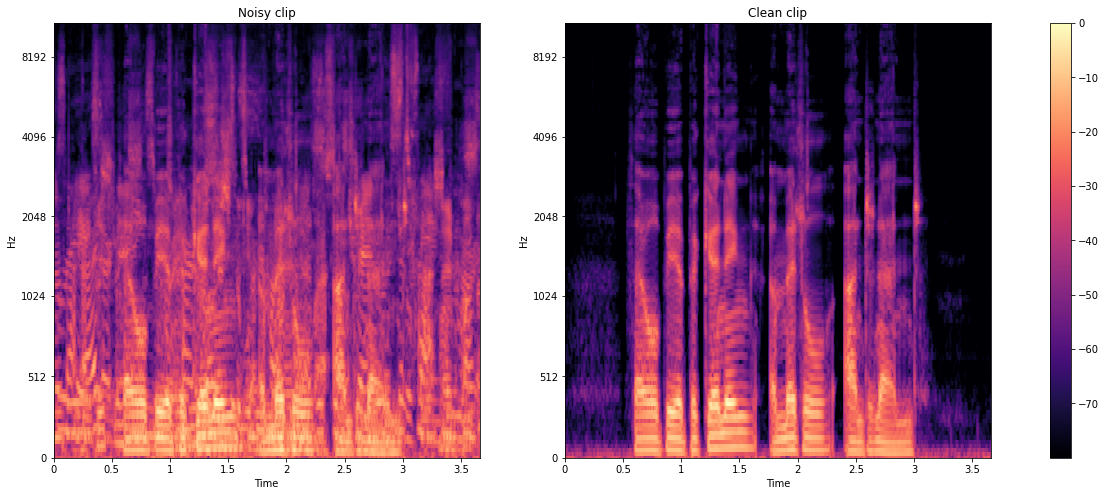

In [4]:
plot_melspectrogram(
    '/home/jorgesierra/Projects/pulseaudio_speech_enhancement/data/noisy_trainset_28spk_wav/p256_123.wav',
    '/home/jorgesierra/Projects/pulseaudio_speech_enhancement/data/clean_trainset_28spk_wav/p256_123.wav')